In [8]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
plt.style.use('fivethirtyeight')

#os.chdir(r"C:\Users\hkopansk\OneDrive - Biogen\Documents\Python Data")

df_cement = pd.read_csv(r'cement.csv')

df_cement['class'] = pd.cut(x = df_cement['comp_strength_Mpa'], 
                            bins = [0, 20, 40, math.inf], 
                            labels = ['Low', 'Med', 'High'])



print(df_cement.info)

<bound method DataFrame.info of       Cement   Slag  Fly_Ash  Water  Superplasticizer  Coarse_Aggregate  \
0      540.0    0.0      0.0  162.0               2.5            1040.0   
1      540.0    0.0      0.0  162.0               2.5            1055.0   
2      332.5  142.5      0.0  228.0               0.0             932.0   
3      332.5  142.5      0.0  228.0               0.0             932.0   
4      198.6  132.4      0.0  192.0               0.0             978.4   
...      ...    ...      ...    ...               ...               ...   
1025   276.4  116.0     90.3  179.6               8.9             870.1   
1026   322.2    0.0    115.6  196.0              10.4             817.9   
1027   148.5  139.4    108.6  192.7               6.1             892.4   
1028   159.1  186.7      0.0  175.6              11.3             989.6   
1029   260.9  100.5     78.3  200.6               8.6             864.5   

      Fine_Aggregate  Age_day  comp_strength_Mpa class  
0         

In [10]:
cement_lm = ols('comp_strength_Mpa ~ Age_day + Cement', 
               data = df_cement).fit()

print(cement_lm.summary())

cement_anova = sm.stats.anova_lm(cement_lm, typ=2)

print(cement_anova)

                            OLS Regression Results                            
Dep. Variable:      comp_strength_Mpa   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     254.5
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.68e-90
Time:                        07:30:44   Log-Likelihood:                -4153.9
No. Observations:                1030   AIC:                             8314.
Df Residuals:                    1027   BIC:                             8329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0087      1.242      8.863      0.0

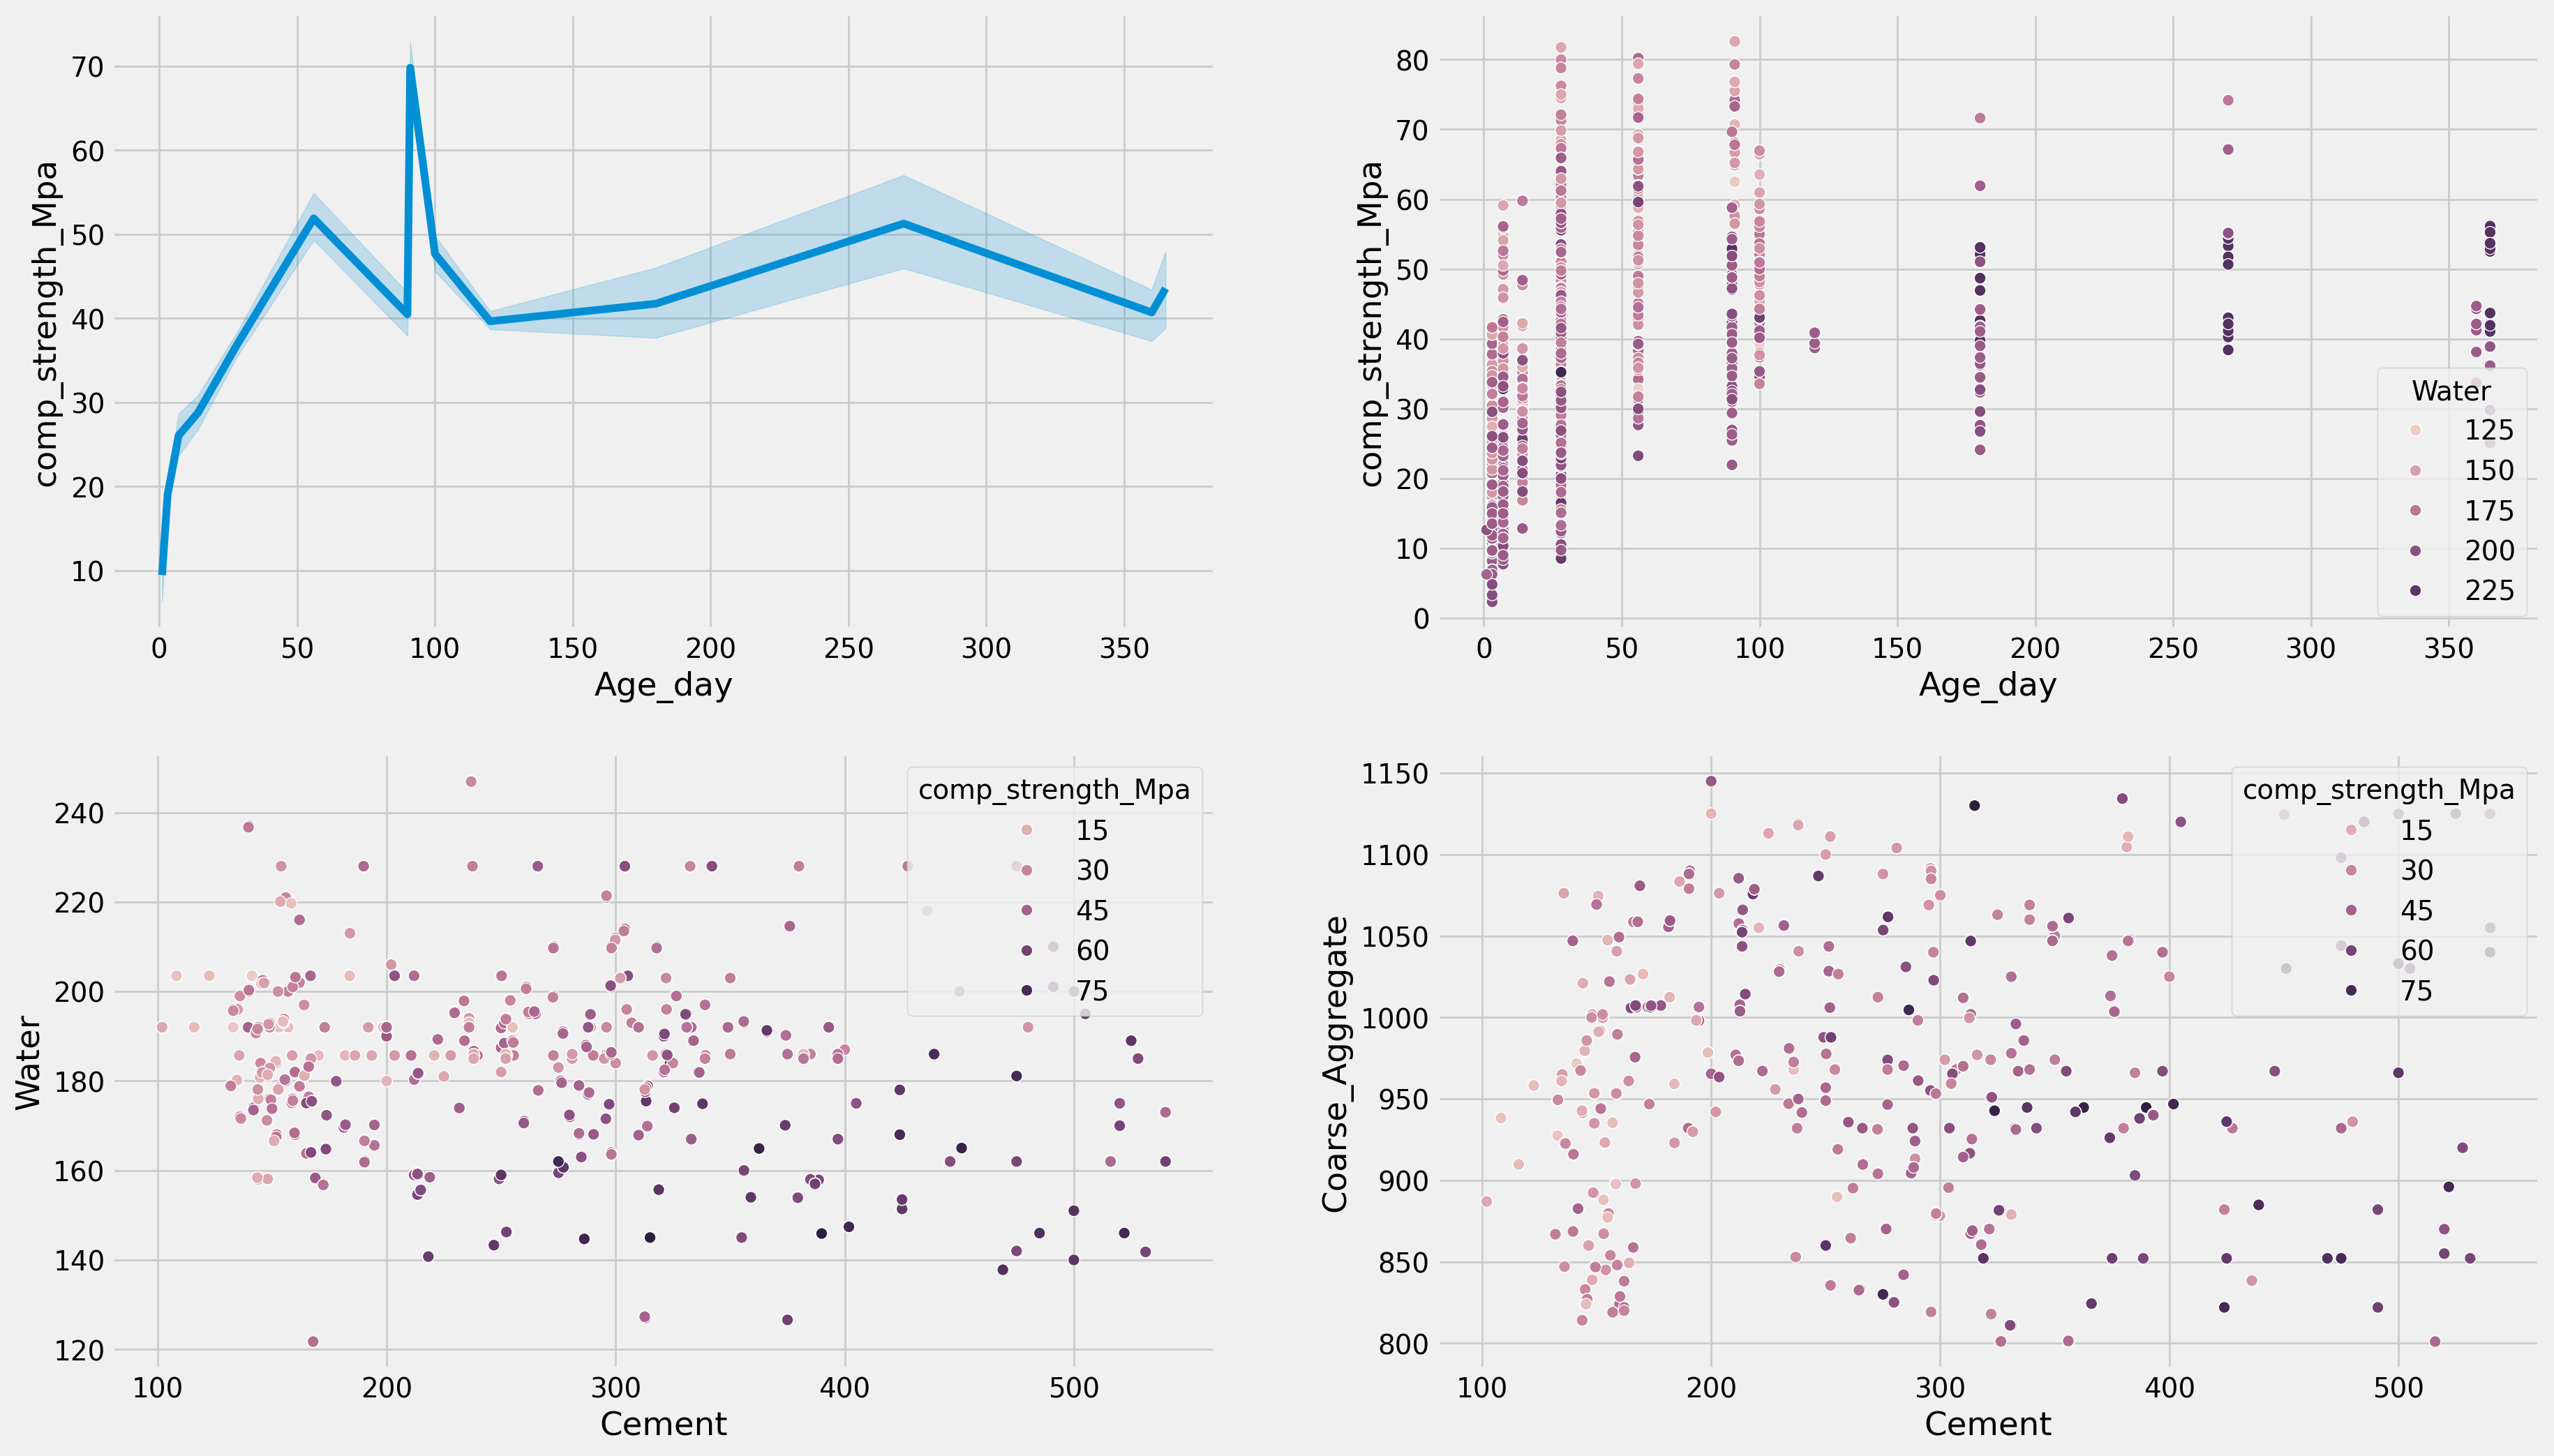

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12), 
                       dpi = 200)

sns.lineplot(x = 'Age_day', y = 'comp_strength_Mpa', 
             data = df_cement, ax = ax[0,0])

sns.scatterplot(x = 'Age_day', y = 'comp_strength_Mpa', 
                data = df_cement, hue = 'Water', ax = ax[0,1])

sns.scatterplot(x = 'Cement', y = 'Water', 
                data = df_cement, hue = 'comp_strength_Mpa', ax = ax[1,0])

sns.scatterplot(x = 'Cement', y = 'Coarse_Aggregate', 
                data = df_cement, hue = 'comp_strength_Mpa', ax = ax[1,1])

plt.show()

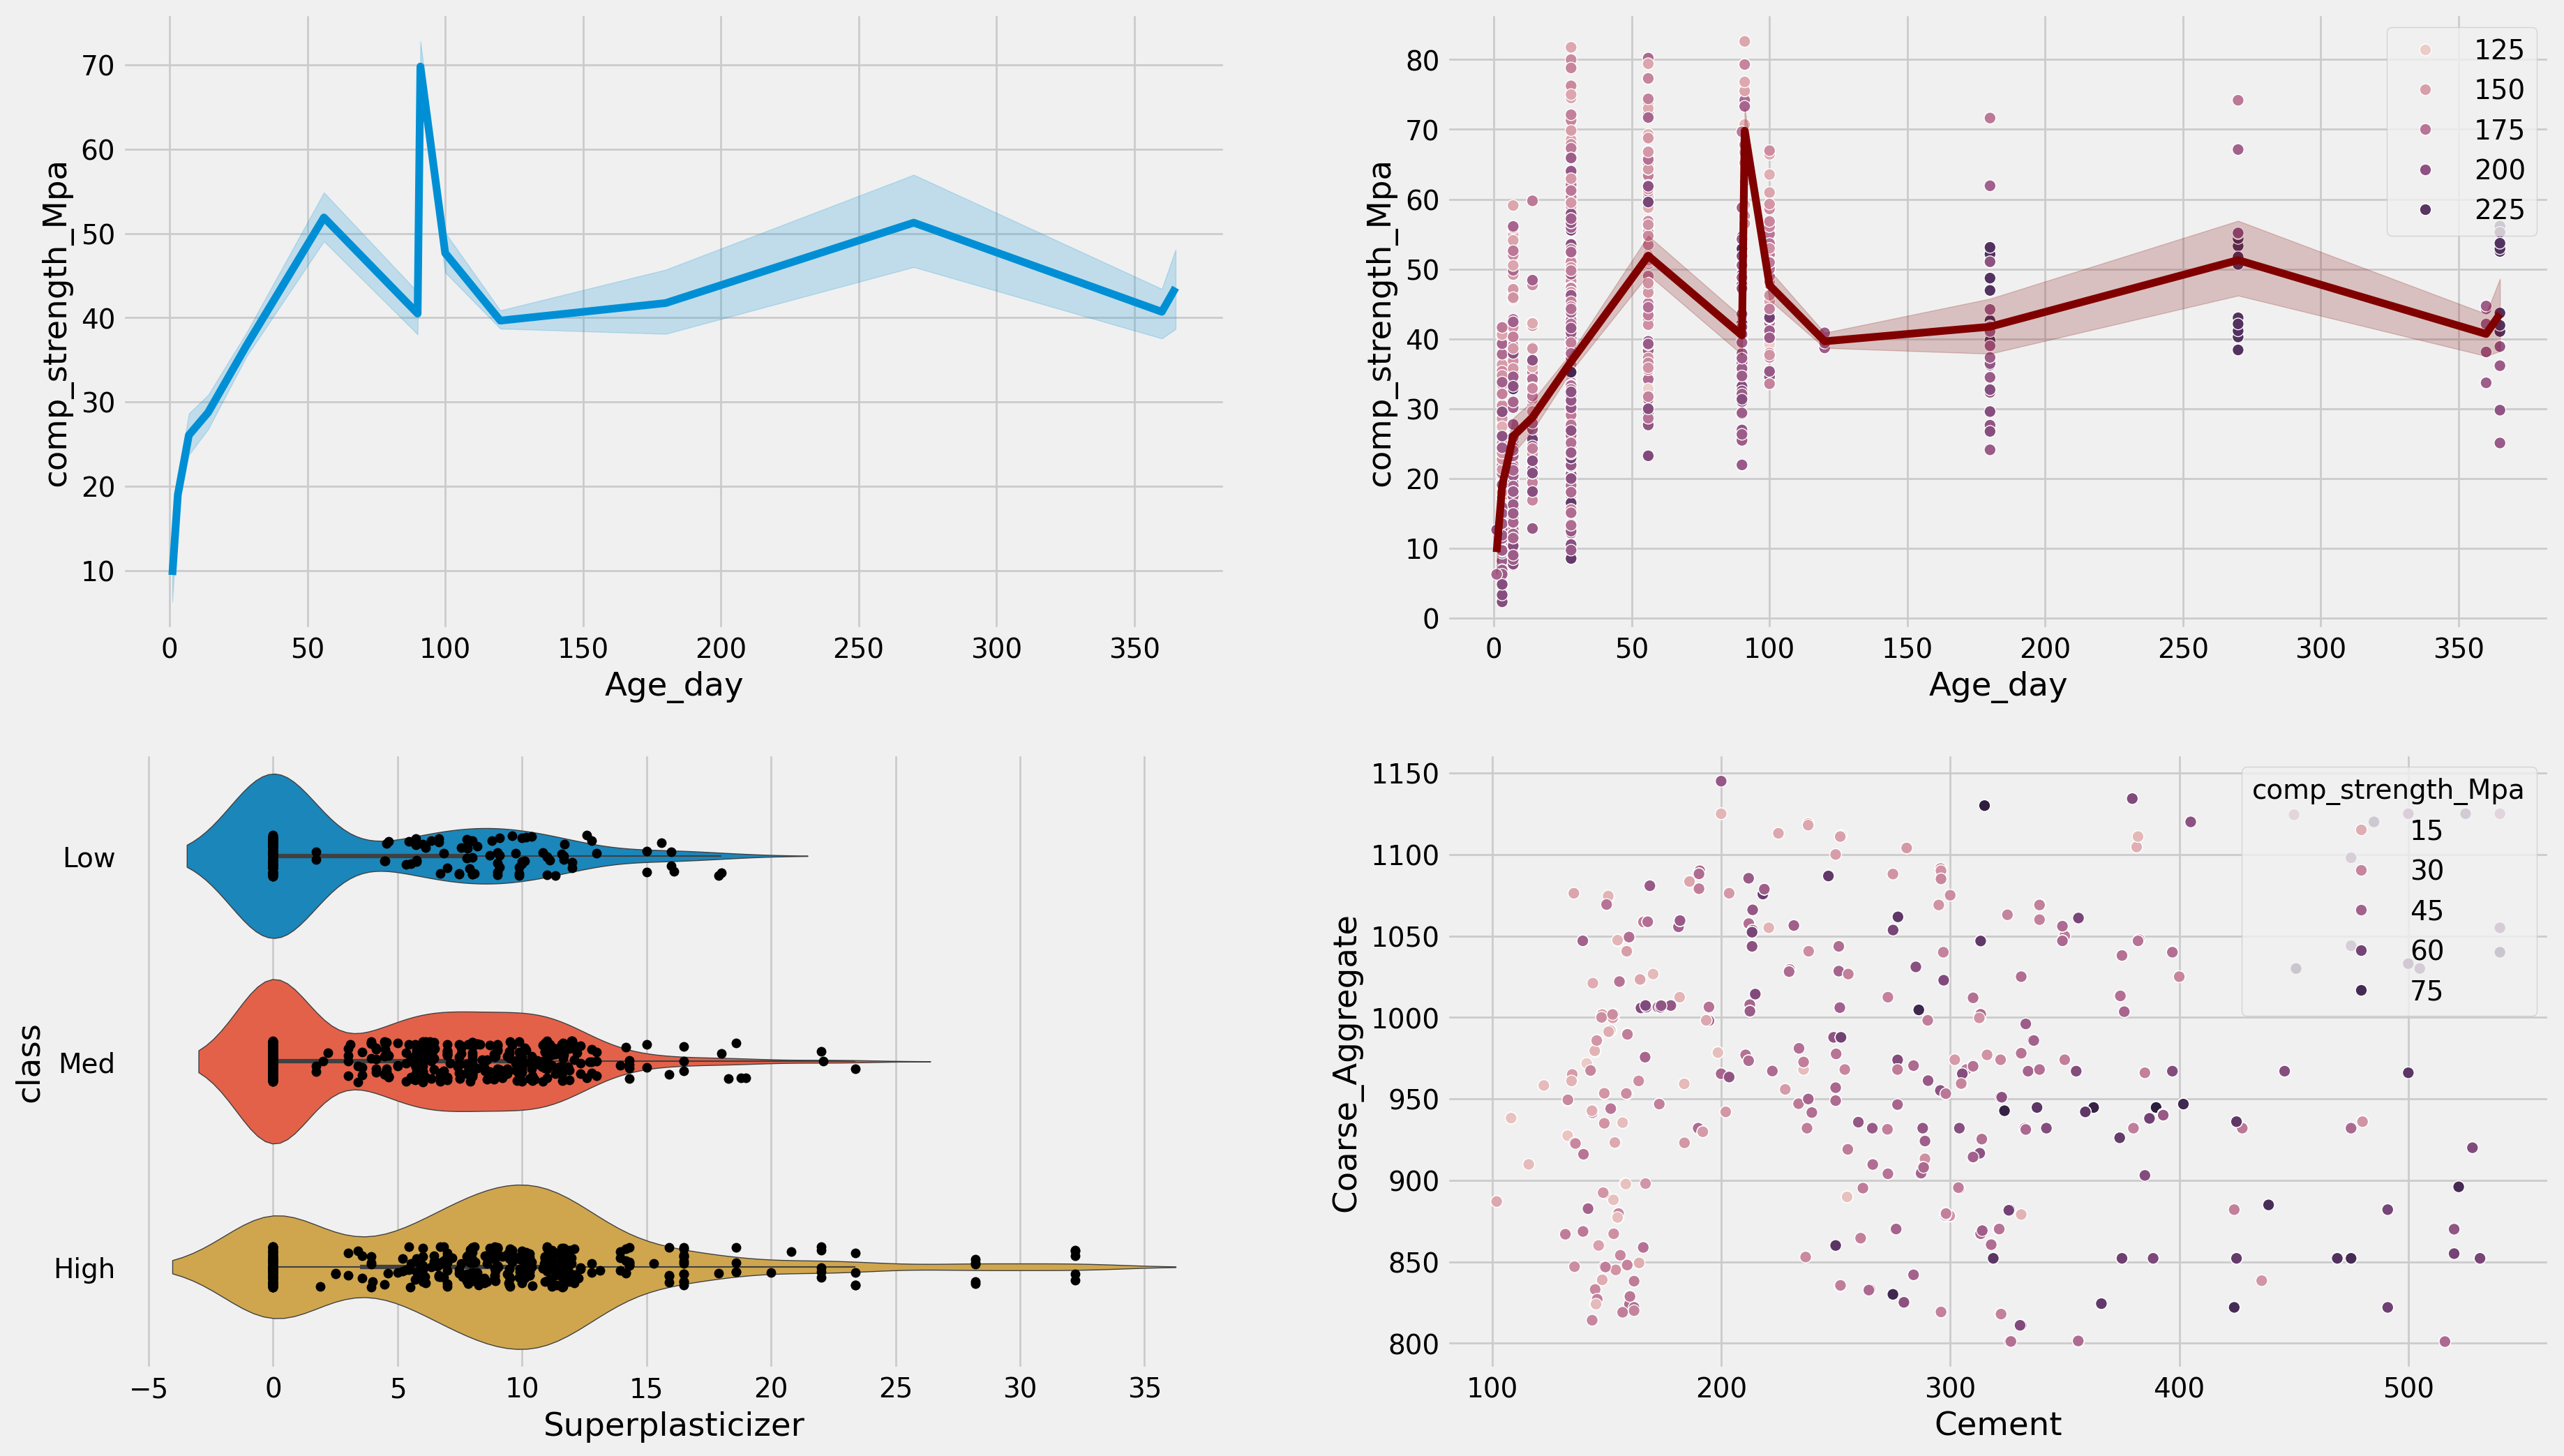

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12), 
                       dpi = 200)

sns.lineplot(x = 'Age_day', y = 'comp_strength_Mpa', 
             data = df_cement, ax = ax[0,0])

#sns.kdeplot(data = df_cement, x = 'Cement', y = 'comp_strength_Mpa', ax = ax[0,0])

sns.scatterplot(x = 'Age_day', y = 'comp_strength_Mpa', 
                data = df_cement, hue = 'Water', ax = ax[0,1])

sns.lineplot(x = 'Age_day', y = 'comp_strength_Mpa', 
             data = df_cement, ax = ax[0,1], color = 'maroon')

sns.stripplot(x = 'Superplasticizer', y = 'class', 
                data = df_cement, color = 'black', ax = ax[1,0])

sns.violinplot(data = df_cement, x = 'Superplasticizer', hue = 'class',
               y = 'class', linewidth = 0.5, ax = ax[1,0])

sns.scatterplot(x = 'Cement', y = 'Coarse_Aggregate', 
                data = df_cement, hue = 'comp_strength_Mpa', ax = ax[1,1])

plt.show()